In [9]:
import pandas as pd
import numpy as np
import geopandas as gpd
from matplotlib import pyplot as plt

In [10]:
# from shapely.geometry import Point
# import fiona

In [11]:
zoneFile = '/home/urwa/Documents/side_projects/urban/UrbanTemporalNetworks/Data/NYC Taxi Zones/geo_export_2497f8b4-b0ae-4b46-8861-cc53a7ac9b3f.shp'
zones = gpd.GeoDataFrame.from_file(zoneFile)
# zones = pd.read_csv(zoneFile)
zones.head(2)

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."


In [12]:
zones['location_i'] = zones['location_i'].astype(int)

In [13]:
import json
with open('/home/urwa/Documents/side_projects/urban/urban_traffic_prediciton/ensemble/lga_attachment.json', 'r') as fp:
    attachments = json.load(fp)

In [14]:
# comms = pd.read_csv('/home/urwa/Documents/side_projects/urban/UrbanTemporalNetworks/Data/ZonetoComm.csv')
# comms.head(2)

In [15]:
mapping = {int(k): int(attachments[k]) for k in attachments}

In [16]:
# mapping = dict(zip(comms.start_id, comms.start_community))

In [18]:
missing = [i for i in zones['location_i'] if i not in mapping]
print(len(missing))
for m in missing:
    mapping[m]=24

5


In [19]:
zones['community'] = zones['location_i'].apply(lambda x: mapping[x]) 

In [20]:
zones.head(2)

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry,community
0,EWR,1,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695...",15
1,Queens,2,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ...",10


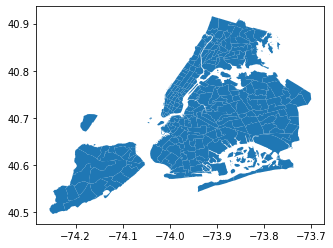

In [21]:
zones.plot()

In [22]:
zones["community"] =zones["community"].astype(str)
zones = zones[["community", 'geometry']].dissolve(by='community', aggfunc=sum)
zones['community'] = zones.index

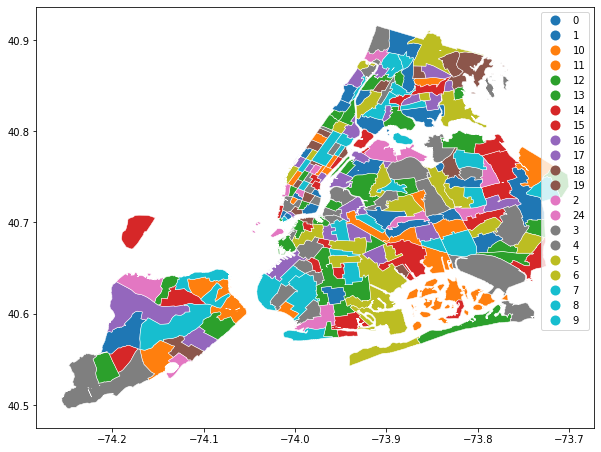

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
zones.plot(column="community", ax=ax, legend=True, linewidth=0.5, edgecolor = 'white')